# Predicting Sales Prices

 ## Dataset Attributes

 The dataset contains information about houses in Ames, Iowa. The data was collected by the Ames City Assessor’s Office describing 2930 property sales which occurred in Ames, Iowa between 2006 and 2010. The dataset, containing 81 variables, was compiled and published by De Cock in 2011.

 Some of the variables contained in the original dataset have been removed from the the dataset provided to you.
 The dataset provided to you contains the following variables:
* **Year_Built:** year that the house was originally constructed
* **Year_Remod_Add:** year that the house was last remodelled
* **Total_Bsmt_SF:** total size of basement area in square feet
* **First_Flr_SF:** size of the first floor in square feet
* **Second_Flr_SF:** size of the second floor in square feet
* **Gr_Liv_Area:** size of above grade, ground living area in square feet
* **Full_Bath:** number of full above grade bathrooms in the house
* **Half_Bath:** number of half above grade bathrooms in the house
* **Bedroom_AbvGr:** number of above grade bedrooms (does not include basement bedrooms)
* **Kitchen_AbvGr:** number of above grade kitchens
* **TotRms_AbvGrd:** total number of above grade rooms (does not include bathrooms)
* **Fireplaces:** number of fireplaces in the house
* **Garage_Area:** size of garage in square feet
* **Sale_Price:** sale price of the house in dollars


*De Cock, D. (2011). "Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester
Regression Project," Journal of Statistics Education, Volume 19, Number 3.*

- https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt
- http://ww2.amstat.org/publications/jse/v19n3/decock.pdf


 ## Objective

 The goal of this task is to analyse the relationship between these variables and build a multiple linear regression model to predict the sales prices based on the 'Gr_Liv_Area' and 'Garage_Area` variables.


In [183]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE

In [184]:
# Read in the data set
ames_df=pd.read_csv('ames.csv')

print(ames_df.head())

   Year_Built  Year_Remod_Add  Total_Bsmt_SF  First_Flr_SF  Second_Flr_SF  \
0        1960            1960           1080          1656              0   
1        1961            1961            882           896              0   
2        1958            1958           1329          1329              0   
3        1968            1968           2110          2110              0   
4        1997            1998            928           928            701   

   Gr_Liv_Area  Full_Bath  Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  \
0         1656          1          0              3              1   
1          896          1          0              2              1   
2         1329          1          1              3              1   
3         2110          2          1              3              1   
4         1629          2          1              3              1   

   TotRms_AbvGrd  Fireplaces  Garage_Area  Sale_Price  
0              7           2          528      215000  
1   

In [185]:
# To clean the data get the number of missing data values per column
missing_data_per_column = ames_df.isna().sum()

print('Missing data values:\n',missing_data_per_column)

Missing data values:
 Year_Built        0
Year_Remod_Add    0
Total_Bsmt_SF     0
First_Flr_SF      0
Second_Flr_SF     0
Gr_Liv_Area       0
Full_Bath         0
Half_Bath         0
Bedroom_AbvGr     0
Kitchen_AbvGr     0
TotRms_AbvGrd     0
Fireplaces        0
Garage_Area       0
Sale_Price        0
dtype: int64


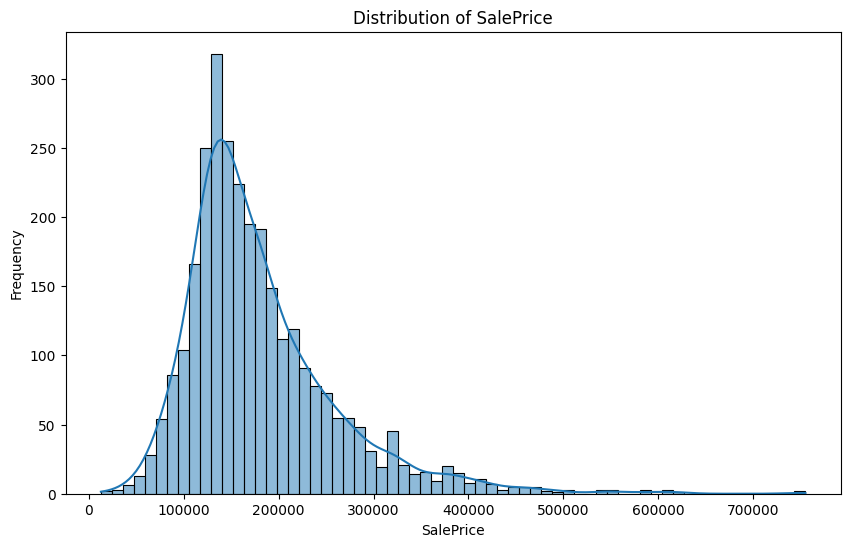

In [186]:
# Explore the data with a histogram to see the frequency of the dependent variable
plt.figure(figsize=(10, 6))
sns.histplot(ames_df['Sale_Price'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

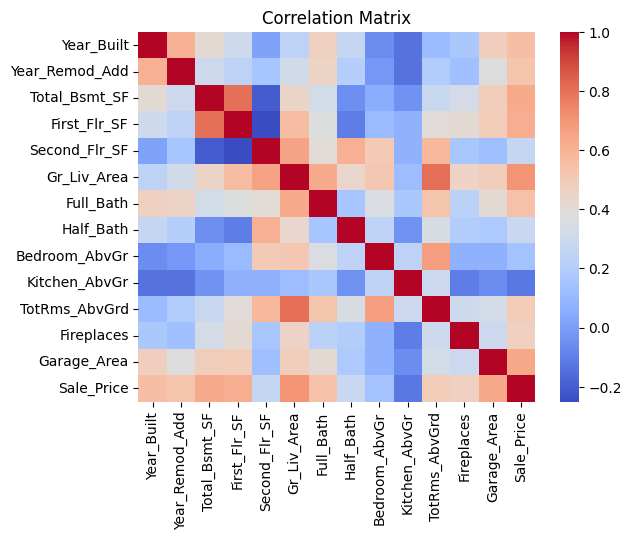

Sale_Price        1.000000
Gr_Liv_Area       0.706780
Garage_Area       0.640138
Total_Bsmt_SF     0.632529
First_Flr_SF      0.621676
Year_Built        0.558426
Full_Bath         0.545604
Year_Remod_Add    0.532974
TotRms_AbvGrd     0.495474
Fireplaces        0.474558
Name: Sale_Price, dtype: float64


In [187]:
#Plot a correlation matrix to see the relationship between the dependent and independent variables
corr_matrix=ames_df.corr()

# Plot the heatmap
plt.figure()
sns.heatmap(corr_matrix,cmap='coolwarm',annot=False)
plt.title('Correlation Matrix')
plt.show()

# Display the top correlations with Sale price
corr_with_saleprice=corr_matrix['Sale_Price'].sort_values(ascending=False)
print(corr_with_saleprice.head(10))

In [188]:
# Split the independent variables from the dependent variable
x=ames_df.drop(columns=['Sale_Price'])
y= ames_df['Sale_Price']

Text(0.5, 1.0, 'Garage_Area vs Sale_Price')

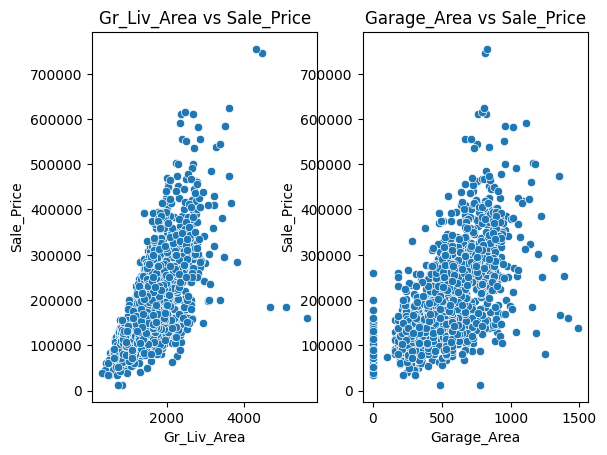

In [189]:
# Explore relationships between the independent and dependent variables
fig, ax=plt.subplots(1,2)
sns.scatterplot(ames_df,x='Gr_Liv_Area', y='Sale_Price', ax=ax[0])
ax[0].set_title('Gr_Liv_Area vs Sale_Price')
sns.scatterplot(ames_df,x='Garage_Area', y='Sale_Price', ax=ax[1])
ax[1].set_title('Garage_Area vs Sale_Price')


In [190]:
# Create a training and test set with a 75:25 split ratio
X=ames_df[['Gr_Liv_Area','Garage_Area']]
y=ames_df['Sale_Price']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=42)

print('Training sets:','\nX:\n',X_train,'\n','\nY:\n',y_train)
print('\nTest sets:','\nX:\n',X_test,'\n','\nY:\n',y_test)

Training sets: 
X:
       Gr_Liv_Area  Garage_Area
844          1431          666
2730         1700          450
2793         1787          748
1187         1740          512
2770         1499          473
...           ...          ...
1638         1424          828
1095         1414          403
1130         1728          673
1294         1740          225
860           768          396

[2197 rows x 2 columns] 
 
Y:
 844     192000
2730    148400
2793    275000
1187    150000
2770    187000
         ...  
1638    155000
1095    176000
1130    207500
1294    122250
860     133900
Name: Sale_Price, Length: 2197, dtype: int64

Test sets: 
X:
       Gr_Liv_Area  Garage_Area
1357         1666          228
2367         1030          264
2822         1724          616
2126          990            0
1544          919          195
...           ...          ...
2521         1226          484
707           861          288
424          1652          840
69           1566          750
736     

In [191]:
# Create a multiple linear regression model
lm = LinearRegression()

# Create the RFE model and select 2 features
rfe=RFE(lm,n_features_to_select=2)

# Fit the RFE model
rfe.fit(X_train,y_train)

# Get the selected features
selected_features=X_train.columns[rfe.support_]
print('Selected Features:', selected_features)

X_train_sel=X_train[selected_features]
X_test_sel=X_test[selected_features]

# Fit the model using 
lm.fit(X_train_sel,y_train)

# Make a prediction based on the test set
y_pred=lm.predict(X_test_sel)

Selected Features: Index(['Gr_Liv_Area', 'Garage_Area'], dtype='object')


In [192]:
# Print the model intercept and coefficients
print('Intercept:\n',lm.intercept_)
print('Coefficients: \n',lm.coef_)

Intercept:
 -5059.448195610574
Coefficients: 
 [ 78.69286848 141.14571761]


In [193]:
# Generate predictions for the test set
print('Predicted values:',y_pred[:5])
print('Actual values:\n',y_test[:5].values)

Predicted values: [158224.09430889 113256.67578876 217552.81911301  72846.49160079
  94782.71287234]
Actual values:
 [161000 116000 196500 123600 126000]


In [194]:
# Evaluate the model
mse=mean_squared_error(y_test,y_pred)
print('Mean squared error:',mse)

r2=r2_score(y_test,y_pred)
print('R2 score:',r2)

Mean squared error: 2634371879.69021
R2 score: 0.6386357969815799


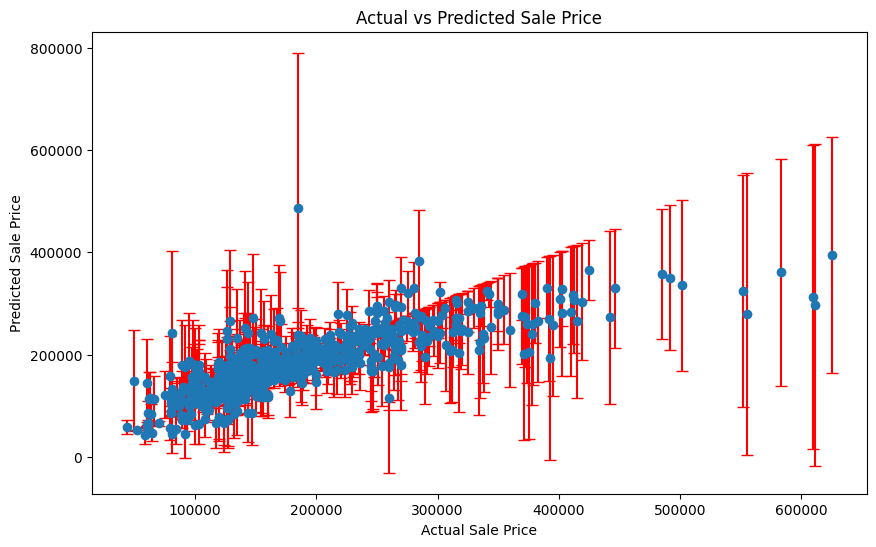

In [195]:
# Error plot: Actual vs Predicted
errors=np.abs(y_test-y_pred)

# Plot with error bars
plt.figure(figsize=(10,6))
plt.errorbar(y_test,y_pred,yerr=errors,fmt='o',ecolor='red',capsize=4,label='Predicted vs Actual')
plt.title('Actual vs Predicted Sale Price')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.show()

In [196]:
# Print the coefficients
print('Coefficients:',lm.coef_)

# Calculate the median of the independent variables
med_gr_liv_area=X_train_sel['Gr_Liv_Area'].median()
med_garage_area=X['Garage_Area'].median()

print('Median Ground Living Area:',med_gr_liv_area)
print('Median Garage Area:',med_garage_area)

# Using the median, predict the sale price fo the house
pred_med_value=lm.intercept_+(lm.coef_[0]*med_gr_liv_area)+(lm.coef_[1]*med_garage_area)
print('Predicted Sale price of a house using median values:', pred_med_value)

Coefficients: [ 78.69286848 141.14571761]
Median Ground Living Area: 1440.0
Median Garage Area: 480.0
Predicted Sale price of a house using median values: 176008.22686954844


**Interpret coefficients in the context of the prediction:**

The coefficient for the Gr_Liv_Area indicates that for each additional square foot of the living area, the sale price increases 78.69 dollars when the garage area remains constant. This increase in value demonstrates the larger the living room the higher the value of the home but not excessively so. However, the Garage coefficient sale price increases 141.15 dollars for each square foot, which is twice the difference. This difference highlights the that the garage space is highly, but both the living area and the garage contribute positively to the house's value. These coefficients provide valuable insights into the value of the house, giving clients a better understanding of property value.

For the median prediction, the values are 1440 sq ft of living area and 480 sq ft of garage space, leading to a median price of 176,008.23 dollars, which is a reasonable and plausible price prediction for a typical home in the dataset.





**Summarise findings**

Analysing the data set it is clear that there is a positive correlation between the sale prices and the area of living as well as the garage, thus this should be mimicked in the model performance. Evaluating the model, its performace was above average as the R2 score is 0.64, which is closer to 1 than 0, suggesting that the model explains a reasonable amount of the variance in sale prices of houses. However, the mean squared error, MSE, (2.6 billion) is high. Additonaly, leading to a RMSE of 51,325, meaning there is an average prediciton deviation of 51,325 dollars. This shows there are significant error predictions, which can also be seen in the error plot 'Actual vs Predicted Sale Price'. 

The model performs well for homes in lower price range, as the predictions are close to the actual values. The error bars are also within a reasonable range as they are relatively shorter, indicating smaller prediction errors. However, for higher price range homes, the model decreases in accuracy which can be seen with larger error bars. This indicates that the model is not capturing important patterns in these homes. The increasing error in variance for higher sale prices indicates the model's underfitting for high-value homes, this maybe due to missing variables or significant outliers. 

